In [168]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns


In [169]:
df=pd.read_csv("/content/Housing.csv")

In [170]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [171]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [172]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


<Axes: >

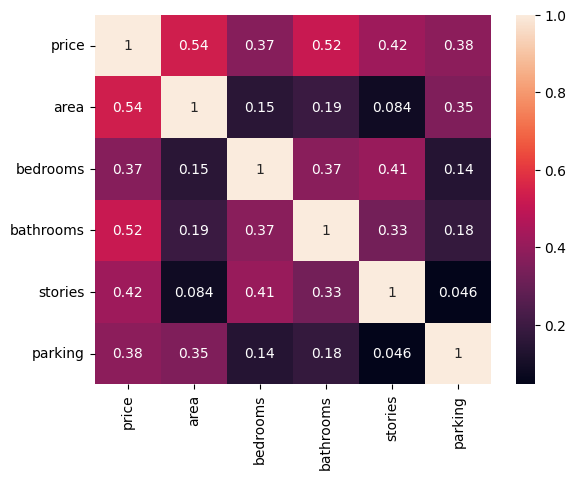

In [174]:
sns.heatmap(df.corr(),annot=True)

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [176]:
l=[]
for i in df.columns:
  if np.dtype(df[i])=='int64':
    continue
  l.append(i)

In [177]:
df_encoded = pd.get_dummies(df, columns=l)


In [178]:
df_encoded.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'mainroad_no', 'mainroad_yes', 'guestroom_no', 'guestroom_yes',
       'basement_no', 'basement_yes', 'hotwaterheating_no',
       'hotwaterheating_yes', 'airconditioning_no', 'airconditioning_yes',
       'prefarea_no', 'prefarea_yes', 'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

In [179]:
df=df_encoded

In [181]:
'''df.drop(['mainroad_no','guestroom_no',
       'basement_no',  'hotwaterheating_no',
       'airconditioning_no',  'prefarea_no',
       'furnishingstatus_unfurnished'],axis=1,inplace=True)'''

"df.drop(['mainroad_no','guestroom_no', \n       'basement_no',  'hotwaterheating_no',\n       'airconditioning_no',  'prefarea_no', \n       'furnishingstatus_unfurnished'],axis=1,inplace=True)"

In [182]:
df.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,...,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,0,1,1,0,...,0,1,0,0,1,0,1,1,0,0
1,12250000,8960,4,4,4,3,0,1,1,0,...,0,1,0,0,1,1,0,1,0,0
2,12250000,9960,3,2,2,2,0,1,1,0,...,1,1,0,1,0,0,1,0,1,0
3,12215000,7500,4,2,2,3,0,1,1,0,...,1,1,0,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,0,1,0,1,...,1,1,0,0,1,1,0,1,0,0


In [183]:
#sns.pairplot(df)

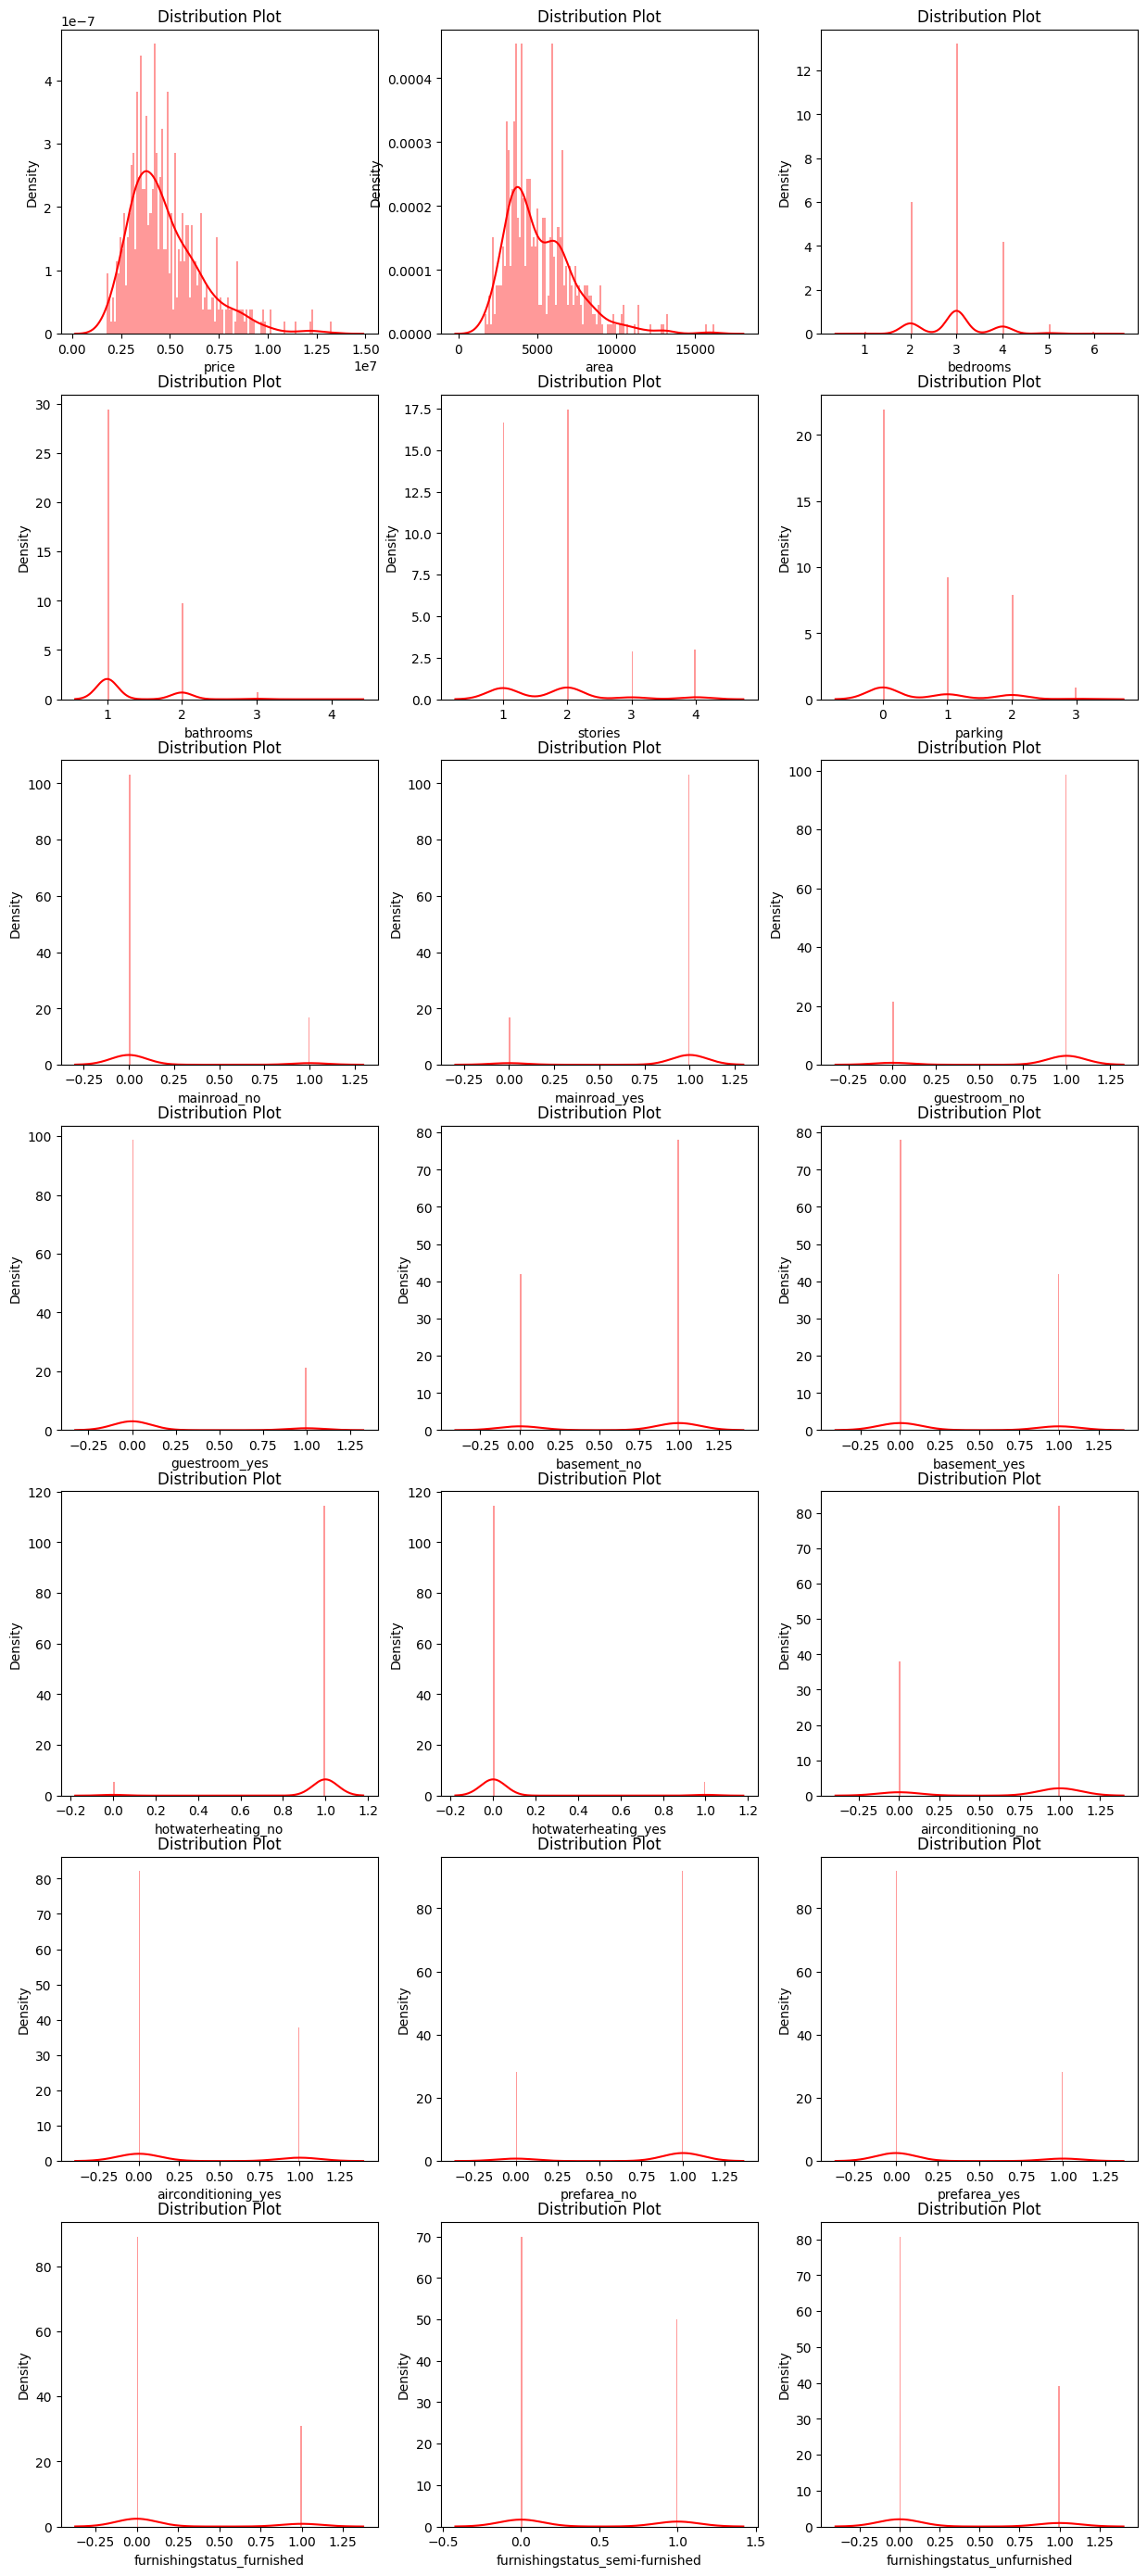

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns

num_columns = len(df.columns)
num_rows = (num_columns + 2) // 3  # 3 plots per row
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))
axes = axes.ravel()
for i, column in enumerate(df.columns):
    sns.distplot(df[column], bins=120, color='red', ax=axes[i])
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')
    axes[i].set_title('Distribution Plot')


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   price                            545 non-null    int64
 1   area                             545 non-null    int64
 2   bedrooms                         545 non-null    int64
 3   bathrooms                        545 non-null    int64
 4   stories                          545 non-null    int64
 5   parking                          545 non-null    int64
 6   mainroad_no                      545 non-null    uint8
 7   mainroad_yes                     545 non-null    uint8
 8   guestroom_no                     545 non-null    uint8
 9   guestroom_yes                    545 non-null    uint8
 10  basement_no                      545 non-null    uint8
 11  basement_yes                     545 non-null    uint8
 12  hotwaterheating_no               545 non-null    u

In [186]:
b=[]
for i in df.columns:
  if np.dtype(df[i])=='int64':

    b.append(i)

  #print(i)

In [187]:
b

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

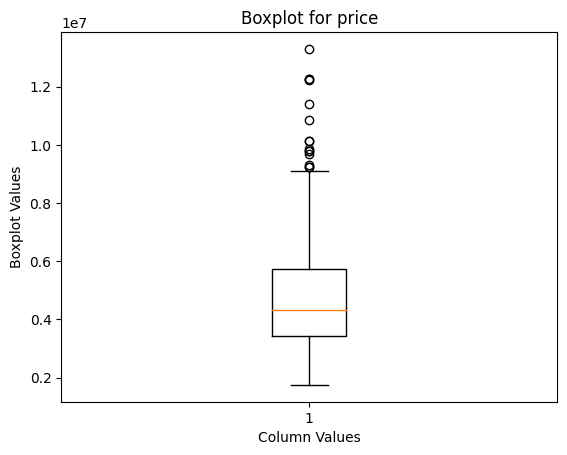

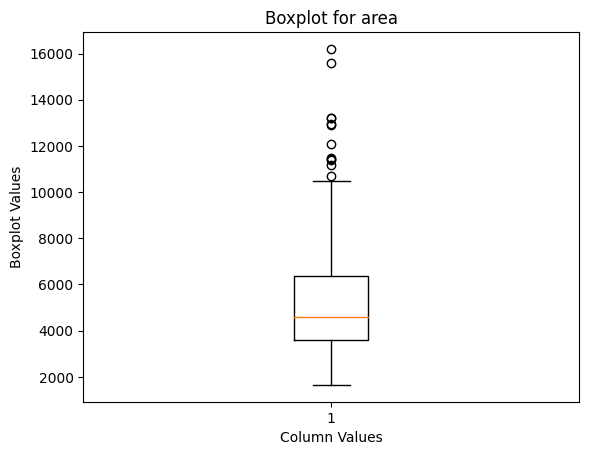

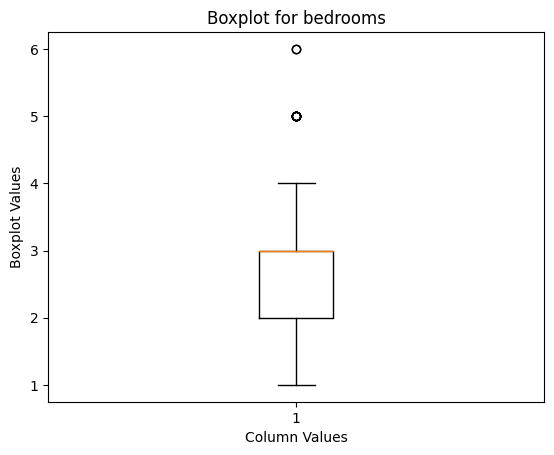

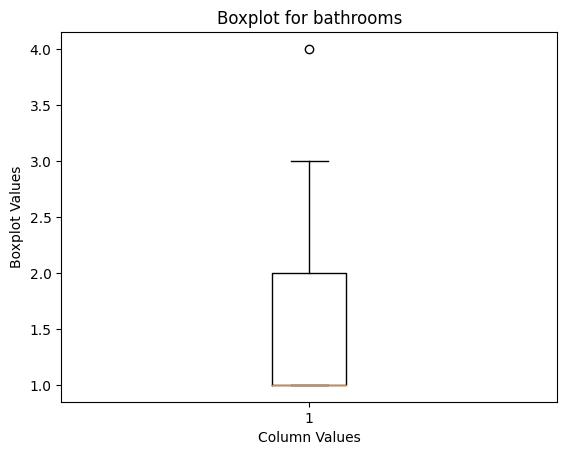

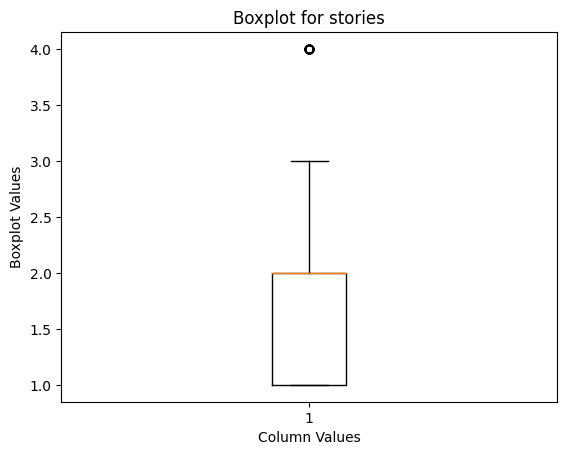

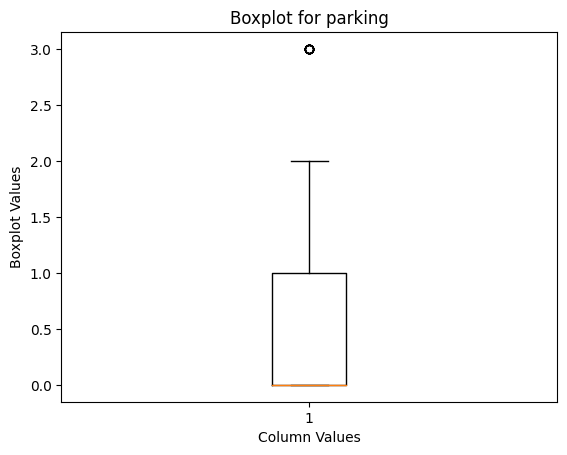

In [188]:
a=[]
for column in b:

    #print("*"*12,i,"*"*12)
    plt.figure()
    plt.boxplot(df[column])
    plt.title(f'Boxplot for {column}')
    plt.xlabel('Column Values')
    plt.ylabel('Boxplot Values')

In [189]:
def outlier(i):
  q1=df[i].quantile(0.25)
  q3=df[i].quantile(0.75)
  up=q3+(q3-q1)*1.5
  lw=q1-(q3-q1)*1.5
  return up,lw

In [190]:
def treat_outlier(i):
  up,lw=outlier(i)
  df[i] = np.where(df[i] > up, up, np.where(df[i] < lw, lw, df[i]))



In [191]:
for i in b:
  treat_outlier(i)


In [192]:
for i in b:
  print(i)
  up,lw=outlier(i)
  print(df[i]>up)
  print(df[i]<lw)

price
0      False
1      False
2      False
3      False
4      False
       ...  
540    False
541    False
542    False
543    False
544    False
Name: price, Length: 545, dtype: bool
0      False
1      False
2      False
3      False
4      False
       ...  
540    False
541    False
542    False
543    False
544    False
Name: price, Length: 545, dtype: bool
area
0      False
1      False
2      False
3      False
4      False
       ...  
540    False
541    False
542    False
543    False
544    False
Name: area, Length: 545, dtype: bool
0      False
1      False
2      False
3      False
4      False
       ...  
540    False
541    False
542    False
543    False
544    False
Name: area, Length: 545, dtype: bool
bedrooms
0      False
1      False
2      False
3      False
4      False
       ...  
540    False
541    False
542    False
543    False
544    False
Name: bedrooms, Length: 545, dtype: bool
0      False
1      False
2      False
3      False
4      False
       ..

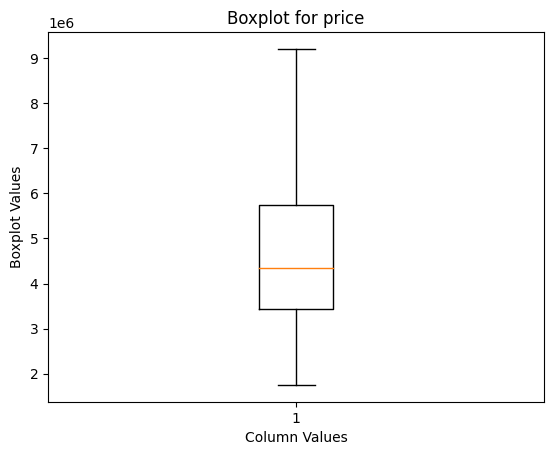

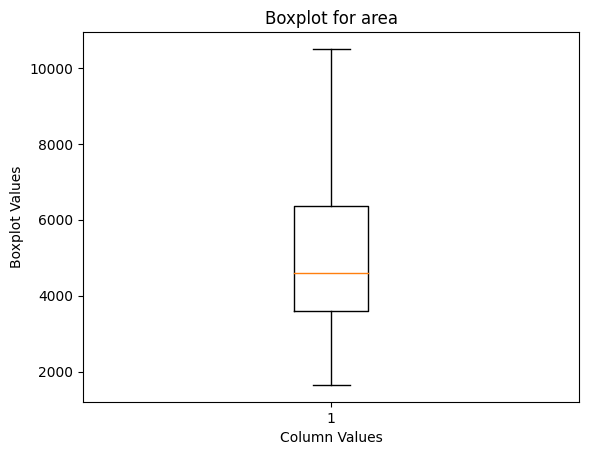

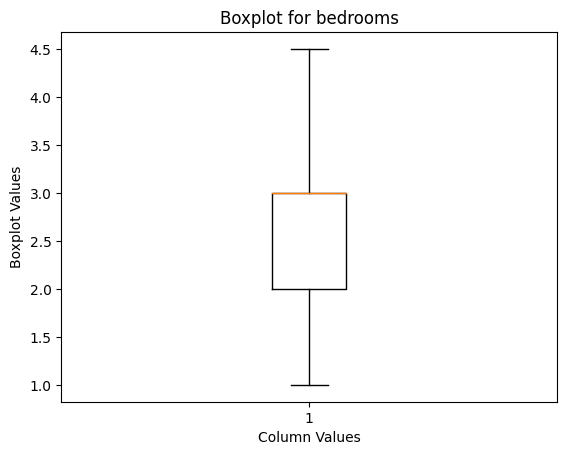

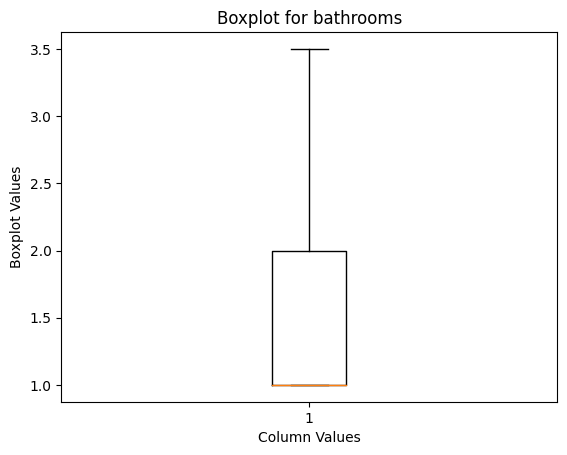

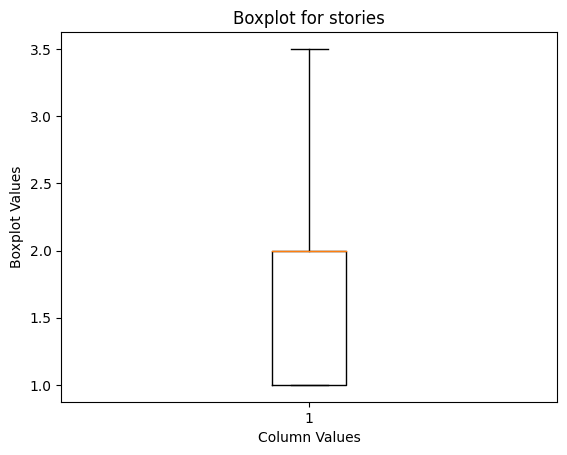

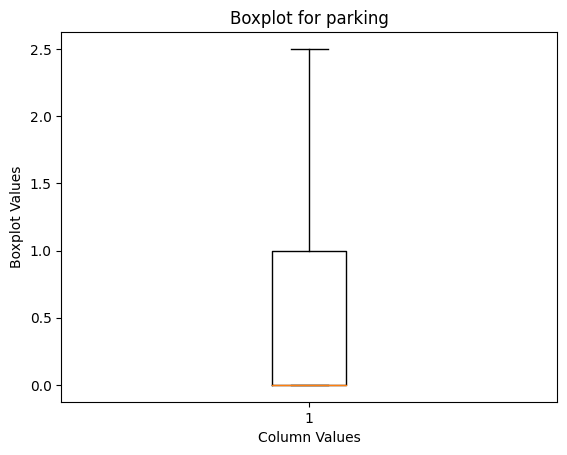

In [193]:
for column in b:
    #print("*"*12,i,"*"*12)
    plt.figure()
    plt.boxplot(df[column])
    plt.title(f'Boxplot for {column}')
    plt.xlabel('Column Values')
    plt.ylabel('Boxplot Values')

In [194]:
y=df['price']
y=pd.DataFrame(y)
x=df.drop(['price'],axis=1)

In [195]:
x.columns


Index(['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad_no',
       'mainroad_yes', 'guestroom_no', 'guestroom_yes', 'basement_no',
       'basement_yes', 'hotwaterheating_no', 'hotwaterheating_yes',
       'airconditioning_no', 'airconditioning_yes', 'prefarea_no',
       'prefarea_yes', 'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

In [196]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
						for i in range(len(x.columns))]
print(vif_data)


                            feature       VIF
0                              area  1.373714
1                          bedrooms  1.447403
2                         bathrooms  1.276203
3                           stories  1.515461
4                           parking  1.230286
5                       mainroad_no       inf
6                      mainroad_yes       inf
7                      guestroom_no       inf
8                     guestroom_yes       inf
9                       basement_no       inf
10                     basement_yes       inf
11               hotwaterheating_no       inf
12              hotwaterheating_yes       inf
13               airconditioning_no       inf
14              airconditioning_yes       inf
15                      prefarea_no       inf
16                     prefarea_yes       inf
17       furnishingstatus_furnished       inf
18  furnishingstatus_semi-furnished       inf
19     furnishingstatus_unfurnished       inf


In [197]:

import statsmodels.api as sm

X = sm.add_constant(df[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking','mainroad_no', 'mainroad_yes', 'guestroom_no', 'guestroom_yes','basement_no', 'basement_yes', 'hotwaterheating_no',
       'hotwaterheating_yes', 'airconditioning_no', 'airconditioning_yes',
       'prefarea_no', 'prefarea_yes', 'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']])


model = sm.OLS(y, X).fit()

durbin_watson_statistic = sm.stats.durbin_watson(model.resid)

# Check for autocorrelation
if durbin_watson_statistic < 2:
    result = "Positive autocorrelation may be present."
elif durbin_watson_statistic > 2:
    result = "Negative autocorrelation may be present."
else:
    result = "No significant autocorrelation detected."

print(f"Durbin-Watson Statistic: {durbin_watson_statistic}")
print(f"Durbin-Watson Test Result: {result}")


Durbin-Watson Statistic: 1.100384862091084
Durbin-Watson Test Result: Positive autocorrelation may be present.


In [198]:
#not a regresison modle it is time seroes forcasting model


In [199]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalized_data = scaler.fit_transform(df)
normalized_df = pd.DataFrame(normalized_data, columns=df.columns)



In [200]:
df2=df

In [201]:
df=normalized_df

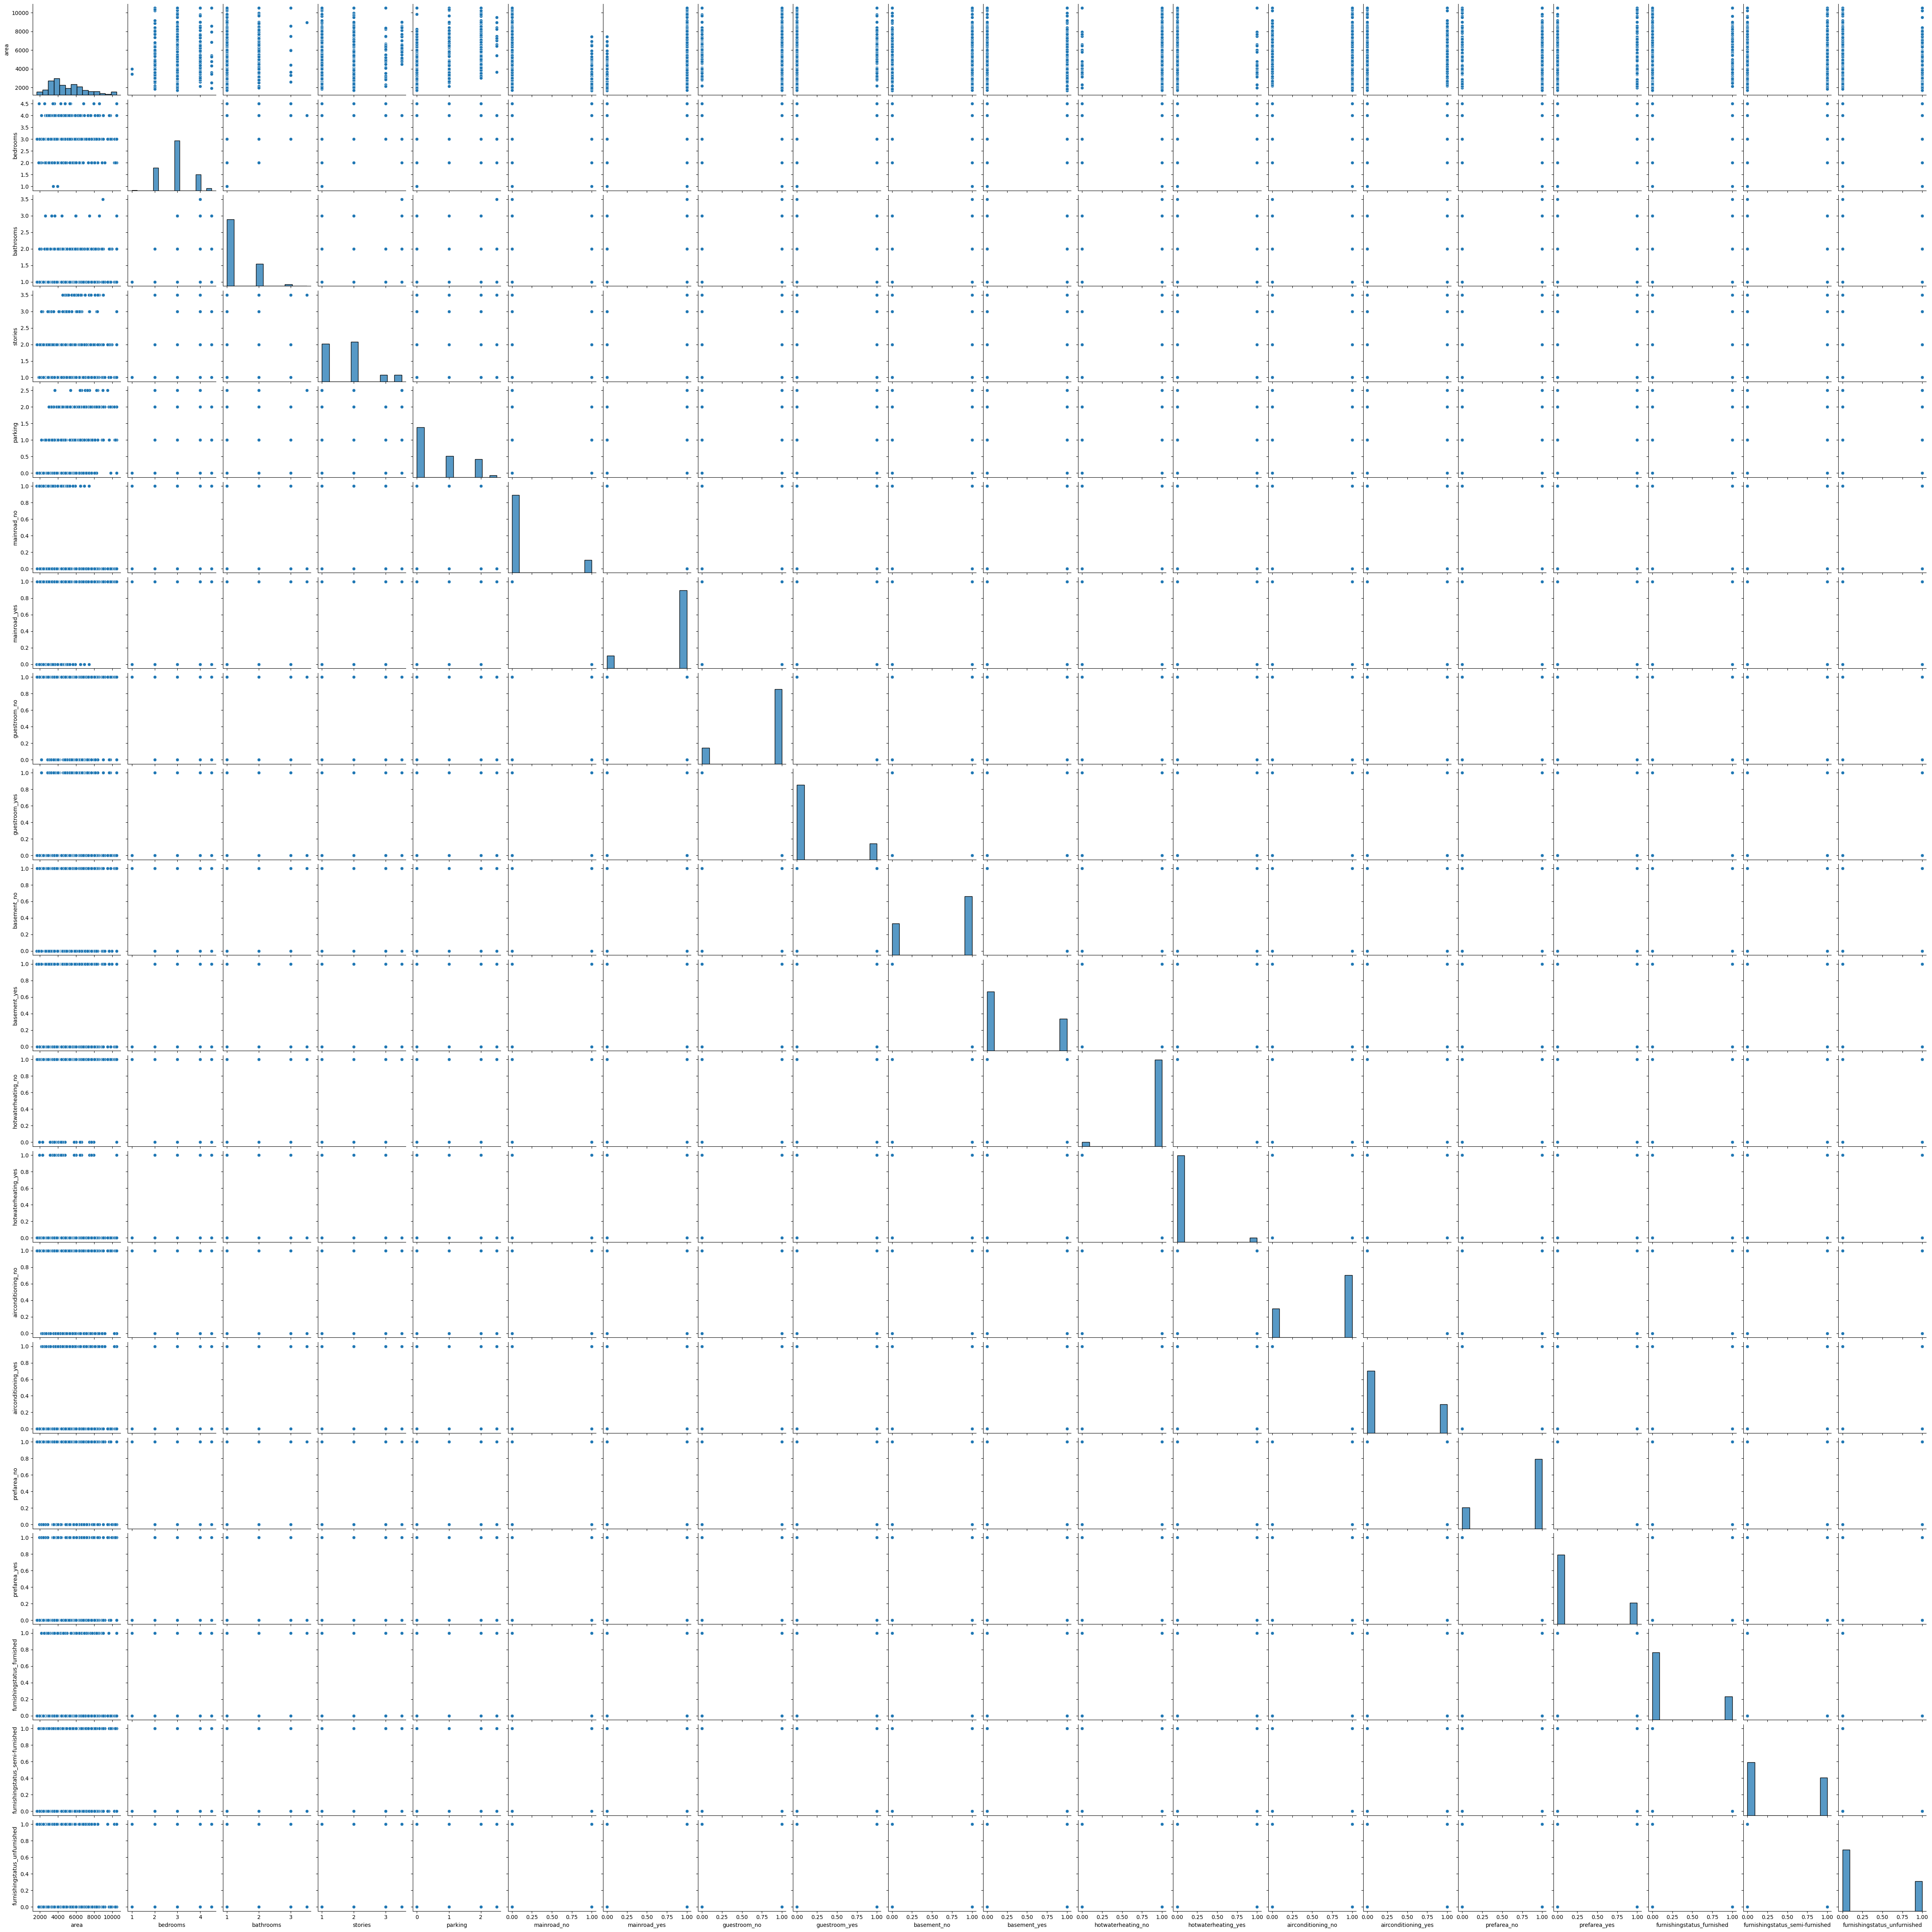

In [202]:
sns.pairplot(x)

<Axes: >

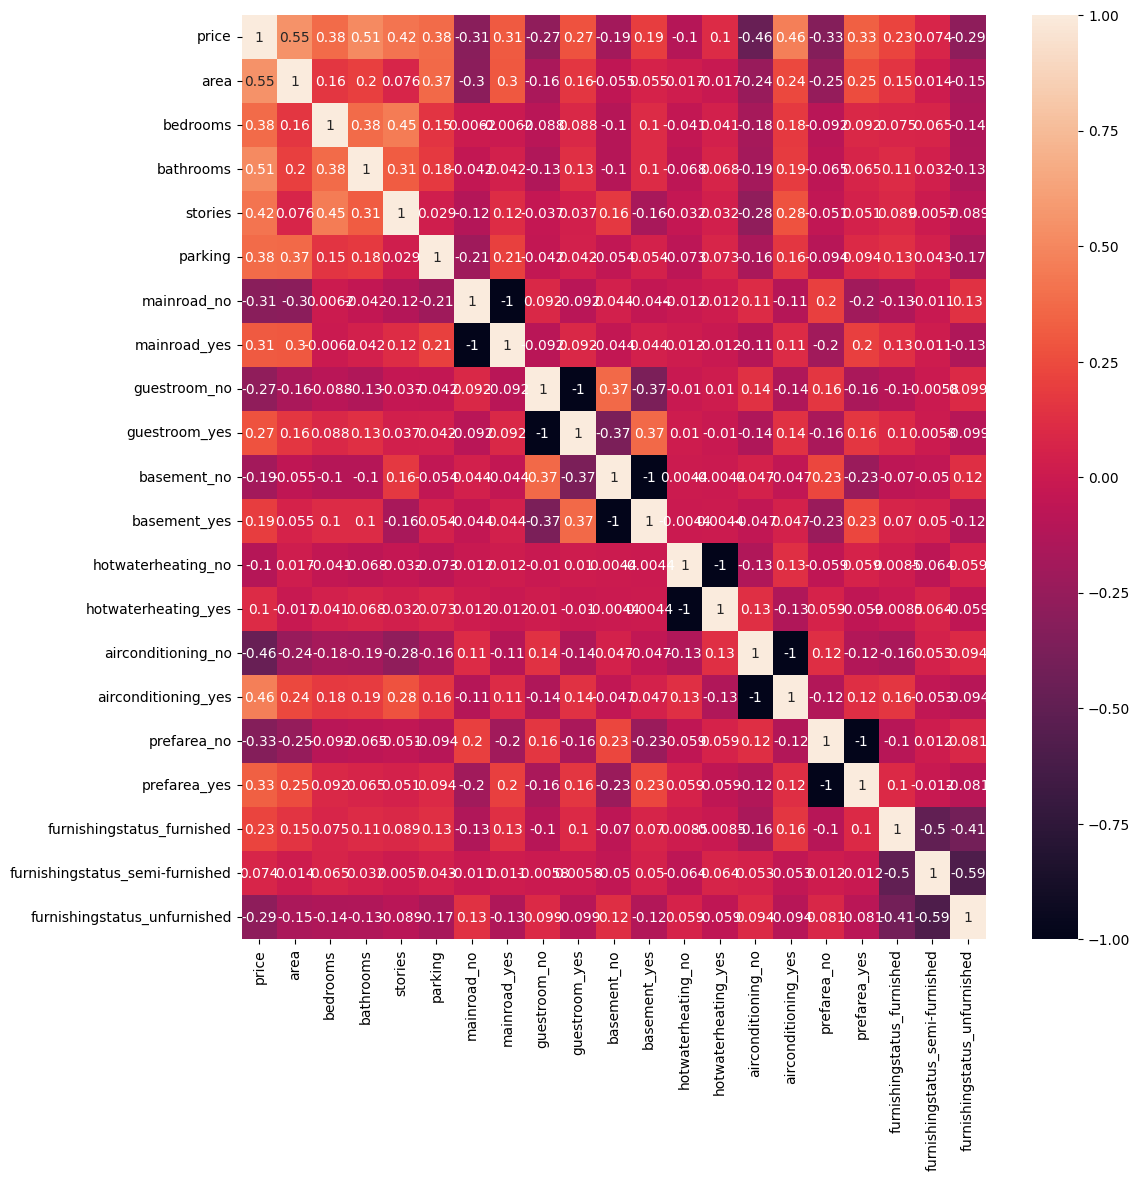

In [203]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

In [204]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)



In [205]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")


Mean Squared Error: 927328757508.0731
R-squared: 0.6344
